In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('strong_scaling.csv')

In [57]:
df.describe()

,nworkers,mean_time
count,10.000000,10.000000
mean,10.300000,1.551544
std,7.717944,1.187328
min,1.000000,0.628273
25%,4.500000,0.765964
50%,9.000000,1.023538
75%,15.000000,2.023435
max,24.000000,4.387560


Text(0.5, 1.0, 'Time taken, n=2048')

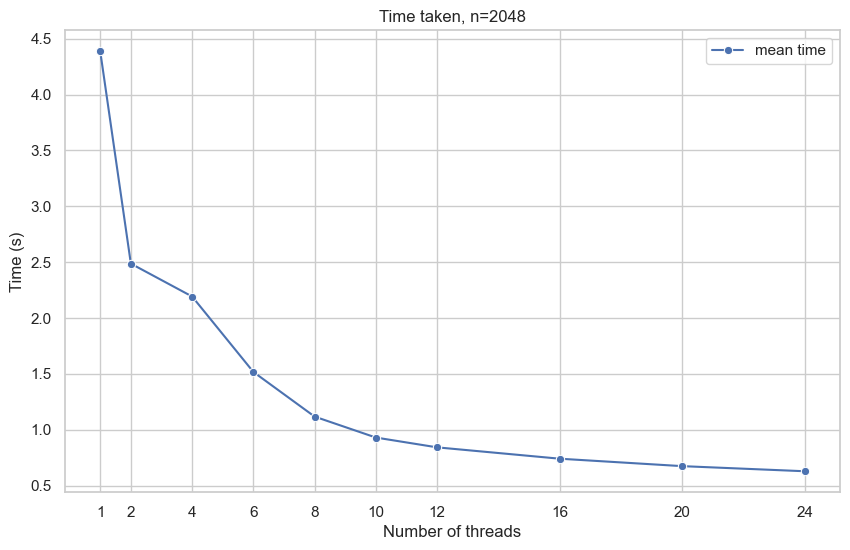

In [58]:
# plot the data
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# plot mean_time againts number of threads
sns.lineplot(x="nworkers", y="mean_time", data=df, marker='o', label='mean time')
plt.xlabel('Number of threads')
plt.ylabel('Time (s)')
plt.xticks(df['nworkers'])
plt.title('Time taken, n=2048')



In [59]:
# create a new column for speedup
df['speedup'] = df['mean_time'][0]/df['mean_time']


In [60]:
df['efficiency'] = df['speedup']/df['nworkers']

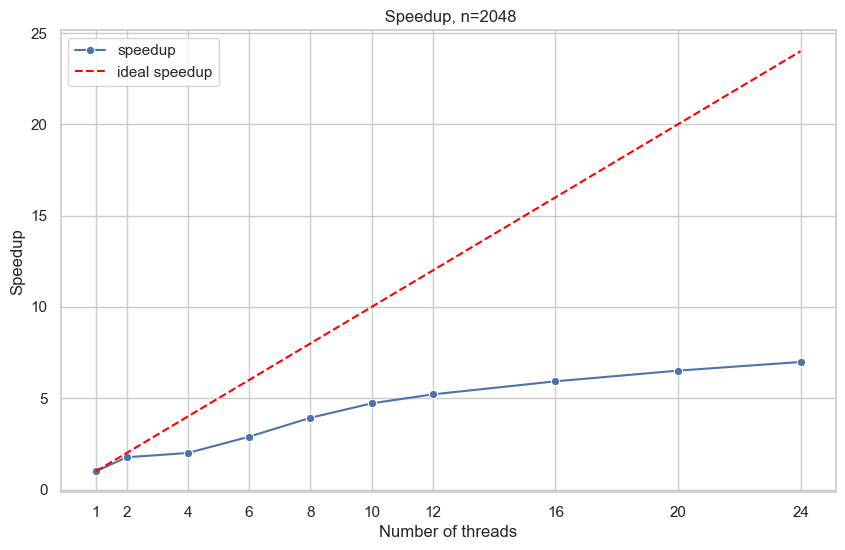

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="nworkers", y="speedup", data=df, marker='o', label='speedup')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.xticks(df['nworkers'])
plt.title(' Speedup, n=2048')
# odraw a line x=y 
plt.plot(df['nworkers'], df['nworkers'], linestyle='--', color='red', label='ideal speedup')
plt.legend()
# equal axis
plt.show()


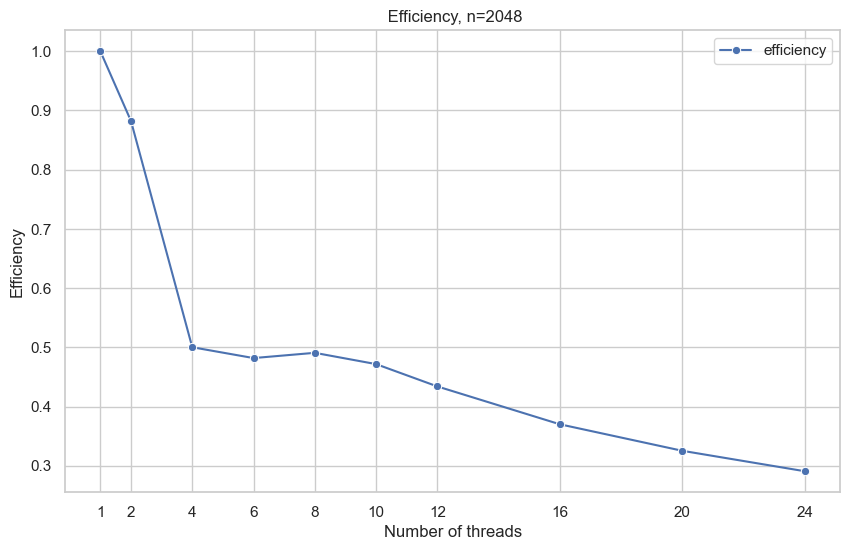

In [62]:
# efficiency
plt.figure(figsize=(10, 6))
sns.lineplot(x="nworkers", y="efficiency", data=df, marker='o', label='efficiency')
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')
plt.xticks(df['nworkers'])
plt.title(' Efficiency, n=2048')
plt.legend()
plt.show()
